In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/plant_pathology512and256.zip' -d '/content/image_small/'

Archive:  /content/drive/MyDrive/plant_pathology512and256.zip
  inflating: /content/image_small/train.csv  
  inflating: /content/image_small/test.csv  
  inflating: /content/image_small/plant_pathology_small_256.zip  
  inflating: /content/image_small/plant_pathology_small_512.zip  


In [ ]:
!unzip '/content/image_small/plant_pathology_small_256.zip' -d '/content/image_folder'

Archive:  /content/image_small/plant_pathology_small_256.zip
  inflating: /content/image_folder/Test_1397.jpg  
  inflating: /content/image_folder/Test_1637.jpg  
  inflating: /content/image_folder/Test_314.jpg  
  inflating: /content/image_folder/Test_257.jpg  
  inflating: /content/image_folder/Train_1321.jpg  
  inflating: /content/image_folder/Test_1159.jpg  
  inflating: /content/image_folder/Train_870.jpg  
  inflating: /content/image_folder/Train_1752.jpg  
  inflating: /content/image_folder/Train_581.jpg  
  inflating: /content/image_folder/Train_904.jpg  
  inflating: /content/image_folder/Test_1628.jpg  
  inflating: /content/image_folder/Train_1319.jpg  
  inflating: /content/image_folder/Test_1607.jpg  
  inflating: /content/image_folder/Test_1462.jpg  
  inflating: /content/image_folder/Train_1357.jpg  
  inflating: /content/image_folder/Test_355.jpg  
  inflating: /content/image_folder/Train_1026.jpg  
  inflating: /content/image_folder/Test_1456.jpg  
  inflating: /conte

In [ ]:
from fastai.vision import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import shutil
from fastai.callbacks import SaveModelCallback

In [ ]:
path = Path('/content/image_small')

In [ ]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


## As can been seen here so it is one hot encoded.

Count plot of different Features


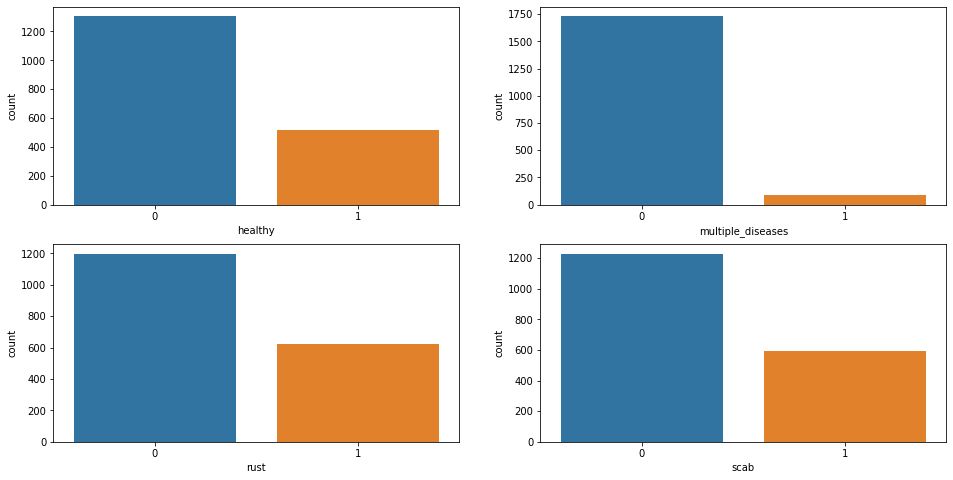

In [ ]:
print('Count plot of different Features')
plt.figure(1,figsize=(16,8))
plt.subplot(221)
sns.countplot(x=train.healthy)
plt.subplot(222)
sns.countplot(x=train.multiple_diseases)
plt.subplot(223)
sns.countplot(x=train.rust)
plt.subplot(224)
sns.countplot(x=train.scab)
plt.show()

## These are quite big images

## New Image size

In [ ]:
cols = train.columns.tolist()[1:];cols

['healthy', 'multiple_diseases', 'rust', 'scab']

In [ ]:
tfms = get_transforms(do_flip=True)

In [ ]:
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [ ]:
#ts = (ImageList.from_df(test,path,folder='images',suffix='.jpg',cols='image_id'))

In [ ]:
data = (ImageList.from_df(train,path='/content',folder='image_folder',suffix='.jpg',cols='image_id')
                .split_by_rand_pct(0.15,seed=23)
                .label_from_df(cols=cols,label_cls = MultiCategoryList, one_hot = True)
                .transform(size=128)
                #.add_test(ts)
                .databunch(bs=64).normalize(imagenet_stats))

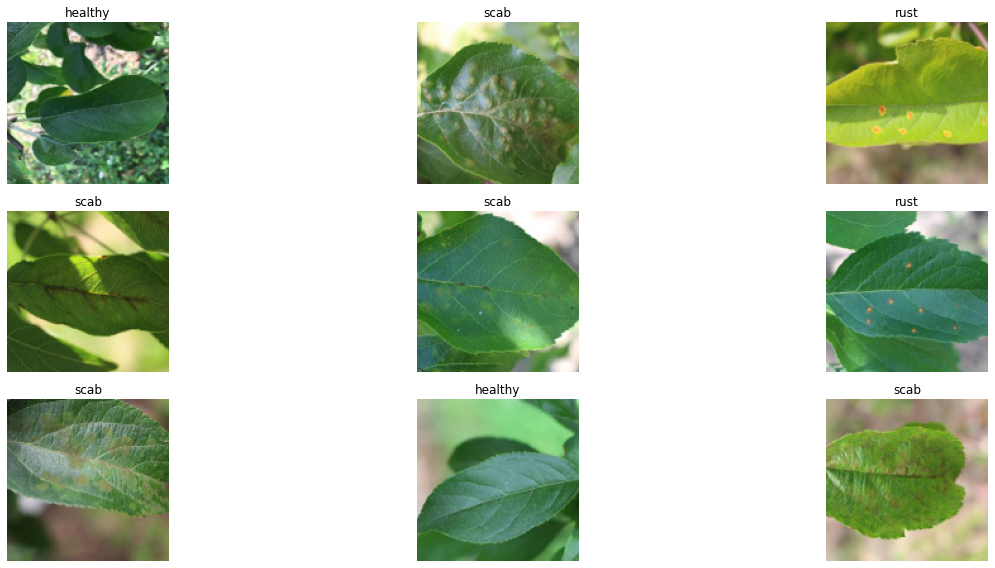

In [ ]:
data.show_batch(rows=3,figsize=(20,8))

In [ ]:
len(data.train_ds),len(data.valid_ds),data.train_ds[0][0].shape

(1548, 273, torch.Size([3, 128, 128]))

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [ ]:
learn = cnn_learner(data, models.resnet50 , metrics = [acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:

import gc
gc.collect()

8220

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


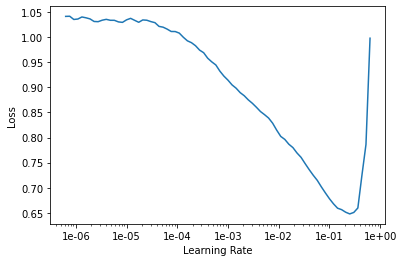

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
np.linspace(1e-2,1e-1,5)

array([0.01  , 0.0325, 0.055 , 0.0775, 0.1   ])

In [ ]:
learn.fit_one_cycle( 10 , slice(1e-1/2) , moms = (0.8,0.7) ,callbacks=[SaveModelCallback(learn,monitor='fbeta')])

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.630246,0.424872,0.780220,0.784450,00:11
1,0.393423,0.365153,0.897436,0.836386,00:10
2,0.300034,0.314962,0.906593,0.844933,00:10
3,0.212240,0.257343,0.938645,0.898657,00:10
4,0.154375,0.341724,0.904762,0.852259,00:10
5,0.113283,0.333490,0.925824,0.876679,00:10
6,0.081082,0.196695,0.952381,0.925519,00:10
7,0.055127,0.213415,0.952381,0.927350,00:10
8,0.036629,0.202226,0.955128,0.929182,00:10
9,0.025223,0.203230,0.956960,0.932845,00:10


Better model found at epoch 0 with fbeta value: 0.7844496965408325.
Better model found at epoch 1 with fbeta value: 0.8363858461380005.
Better model found at epoch 2 with fbeta value: 0.8449328541755676.
Better model found at epoch 3 with fbeta value: 0.898656964302063.
Better model found at epoch 6 with fbeta value: 0.9255189299583435.
Better model found at epoch 7 with fbeta value: 0.9273504614830017.
Better model found at epoch 8 with fbeta value: 0.9291819334030151.
Better model found at epoch 9 with fbeta value: 0.9328449368476868.


In [ ]:
img = open_image('/content/image_folder/Test_1.jpg')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
learn.export('apple_leaf_model.pkl')

In [ ]:
!cp '/content/models/bestmodel.pth' '/content/drive/MyDrive'

In [ ]:
def classify_appleleaf(img_path):
    lbls = ['healthy', 'multiple_diseases', 'rust', 'scab']
    img = open_image(img_path)
    img.show(figsize=(8,8))
    a = learn.predict(img)
    print(lbls[a[2].argmax()])

scab


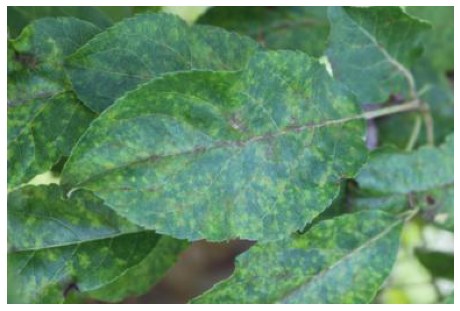

In [ ]:
classify_appleleaf('/content/image_folder/Test_100.jpg')

# New Section